Ben Douglas  <br>
Data: https://data.wprdc.org/dataset/sidewalk-to-street-walkability-ratio  <br>
This data set is measured the ratio of the length sidewalks and steps to the length street. The higher the ratio, the more sidewalks their are compared to streets. This helps us know which neighborhoods have the most walking space without being by roads.  <br>
First I do the imports needed

In [56]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
walkability = pd.read_csv("sidewalkstreetratioupload.csv", sep=",")
walkability

,GEOID,NAMELSAD,SidewalkStepLFt,StreetLFt,Ratio
0,420030103001,Block Group 1,13392.83310,30315.86390,0.441776
1,420030103002,Block Group 2,31944.47597,20586.79493,1.551697
2,420030103003,Block Group 3,18655.20798,12122.70024,1.538866
3,420030103004,Block Group 4,14456.19616,11567.62831,1.249711
4,420030201001,Block Group 1,43952.94811,24426.52459,1.799394
...,...,...,...,...,...
2098,421298084023,Block Group 3,NaN,NaN,NaN
2099,421298085001,Block Group 1,NaN,NaN,NaN
2100,421298086001,Block Group 1,NaN,NaN,NaN
2101,421298086002,Block Group 2,NaN,NaN,NaN


This gives us the sidewalk and step length, street length, and ratio for a certain geo id.

In [46]:
temp = pd.read_csv("sidewalkstreetratiotract.csv", sep=",")
temp

,Tract,SidewalkStepLFt,StreetLFt,Ratio
0,4.200301e+10,78448.71321,74592.98738,1.051690192
1,4.200302e+10,170043.96820,103496.13390,1.642998262
2,4.200302e+10,92663.56238,107882.68170,0.858928986
3,4.200303e+10,63741.19798,36574.88060,1.742758881
4,4.200304e+10,46788.76395,31603.32982,1.480501081
...,...,...,...,...
767,4.212981e+10,0.00000,0.00000,#DIV/0!
768,4.212981e+10,0.00000,0.00000,#DIV/0!
769,4.212981e+10,0.00000,0.00000,#DIV/0!
770,4.212981e+10,0.00000,0.00000,#DIV/0!


This gives us the sidewalk and step length, street length, and ratio for a certain tract.

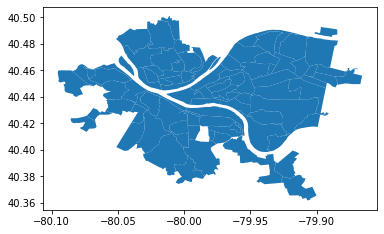

In [47]:
map = geopandas.read_file("Neighborhoods_.shp")
map.plot()


Then I create a general geopandas map using the shape file with the neighborhoods in Pittsburgh.

In [48]:
#get dictionary for geo id to neighborhood
HoodInfo = pd.read_csv("NeighborhoodsInfo.csv", sep=",")
HoodInfo


,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,globalid,created_user,created_date,last_edited_user,last_edited_date,temp,shape_area,shape_length
0,1,233,42,3,140500,3,420031405003,Block Group 3,G5030,S,...,15,Ose Akinlotan,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:13,NaN,8.153647e+06,14047.065024
1,2,203,42,3,140100,3,420031401003,Block Group 3,G5030,S,...,15,Ose Akinlotan,20d4605b-258e-441a-a57e-a28fdabb6d30,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:41,NaN,3.407739e+07,30347.886823
2,3,86,42,3,101700,2,420031017002,Block Group 2,G5030,S,...,15,Ose Akinlotan,bf4065e7-c29c-48bd-b529-e7fd99077238,SDE,2020-08-14T12:57:28,SDE,2020-08-14T12:59:55,NaN,1.275116e+07,14577.441571
3,4,214,42,3,50900,1,420030509001,Block Group 1,G5030,S,...,15,Ose Akinlotan,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,SDE,2020-08-14T12:57:28,SDE,2020-08-14T12:58:41,NaN,4.997845e+06,14216.959213
4,5,173,42,3,300100,5,420033001005,Block Group 5,G5030,S,...,15,Thomas Scharff,8669d2f0-b886-4519-99d0-bb1015b592b0,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:00:19,NaN,8.410563e+06,12003.269761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,215,42,3,141000,1,420031410001,Block Group 1,G5030,S,...,15,Ose Akinlotan,93ce438e-e3ec-410d-a7fd-619646e25dc3,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:20,NaN,5.362506e+06,16007.508980
86,87,211,42,3,51100,1,420030511001,Block Group 1,G5030,S,...,15,Ose Akinlotan,2858633a-175e-459b-a4c9-9aac92bfe033,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:58,NaN,9.519745e+06,19569.102832
87,88,153,42,3,562600,2,420035626002,Block Group 2,G5030,S,...,15,Thomas Scharff,fbc3ab11-0429-476e-80fd-700f969b204a,SDE,2020-08-14T12:57:28,SDE,2020-08-14T12:59:44,NaN,1.690646e+07,21634.558817
88,89,16,42,3,170200,1,420031702001,Block Group 1,G5030,S,...,15,Thomas Scharff,39308990-70d5-4da6-b2a0-a5510f18e9b9,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:33,NaN,2.608218e+07,34676.151320


This neighborhood CSV file gives the general information for each neighborhood in pittsburgh and is useful because it gives the geo id for each neighborhood.

In [49]:
HoodInfo['geoid10'] = HoodInfo['geoid10'].astype(int)
#HoodInfo['tractce10'] = HoodInfo['tractce10'].astype(float)
info = HoodInfo.merge(walkability, how='left', left_on='geoid10', right_on='GEOID')
#info = info[['hood', 'SidewalkStepLFt', 'StreetLFt', 'Ratio']]
info = info[['hood', 'Ratio']]
info = info.sort_values('Ratio', ascending=False)
info

,hood,Ratio
3,Bedford Dwellings,6.644908
1,Squirrel Hill North,3.615286
45,Allegheny Center,3.227465
21,Lincoln-Lemington-Belmar,3.092941
86,Terrace Village,3.017543
...,...,...
50,Chartiers City,0.284980
14,Lincoln Place,0.265934
76,Summer Hill,0.255189
37,New Homestead,0.047462


Now I can combine the neighborhood info with the dataset giving ratios for each geo id using the geo ids of both. This is then simplified to just give the neighborhood name and the ratio. The new dataset can be seen above.

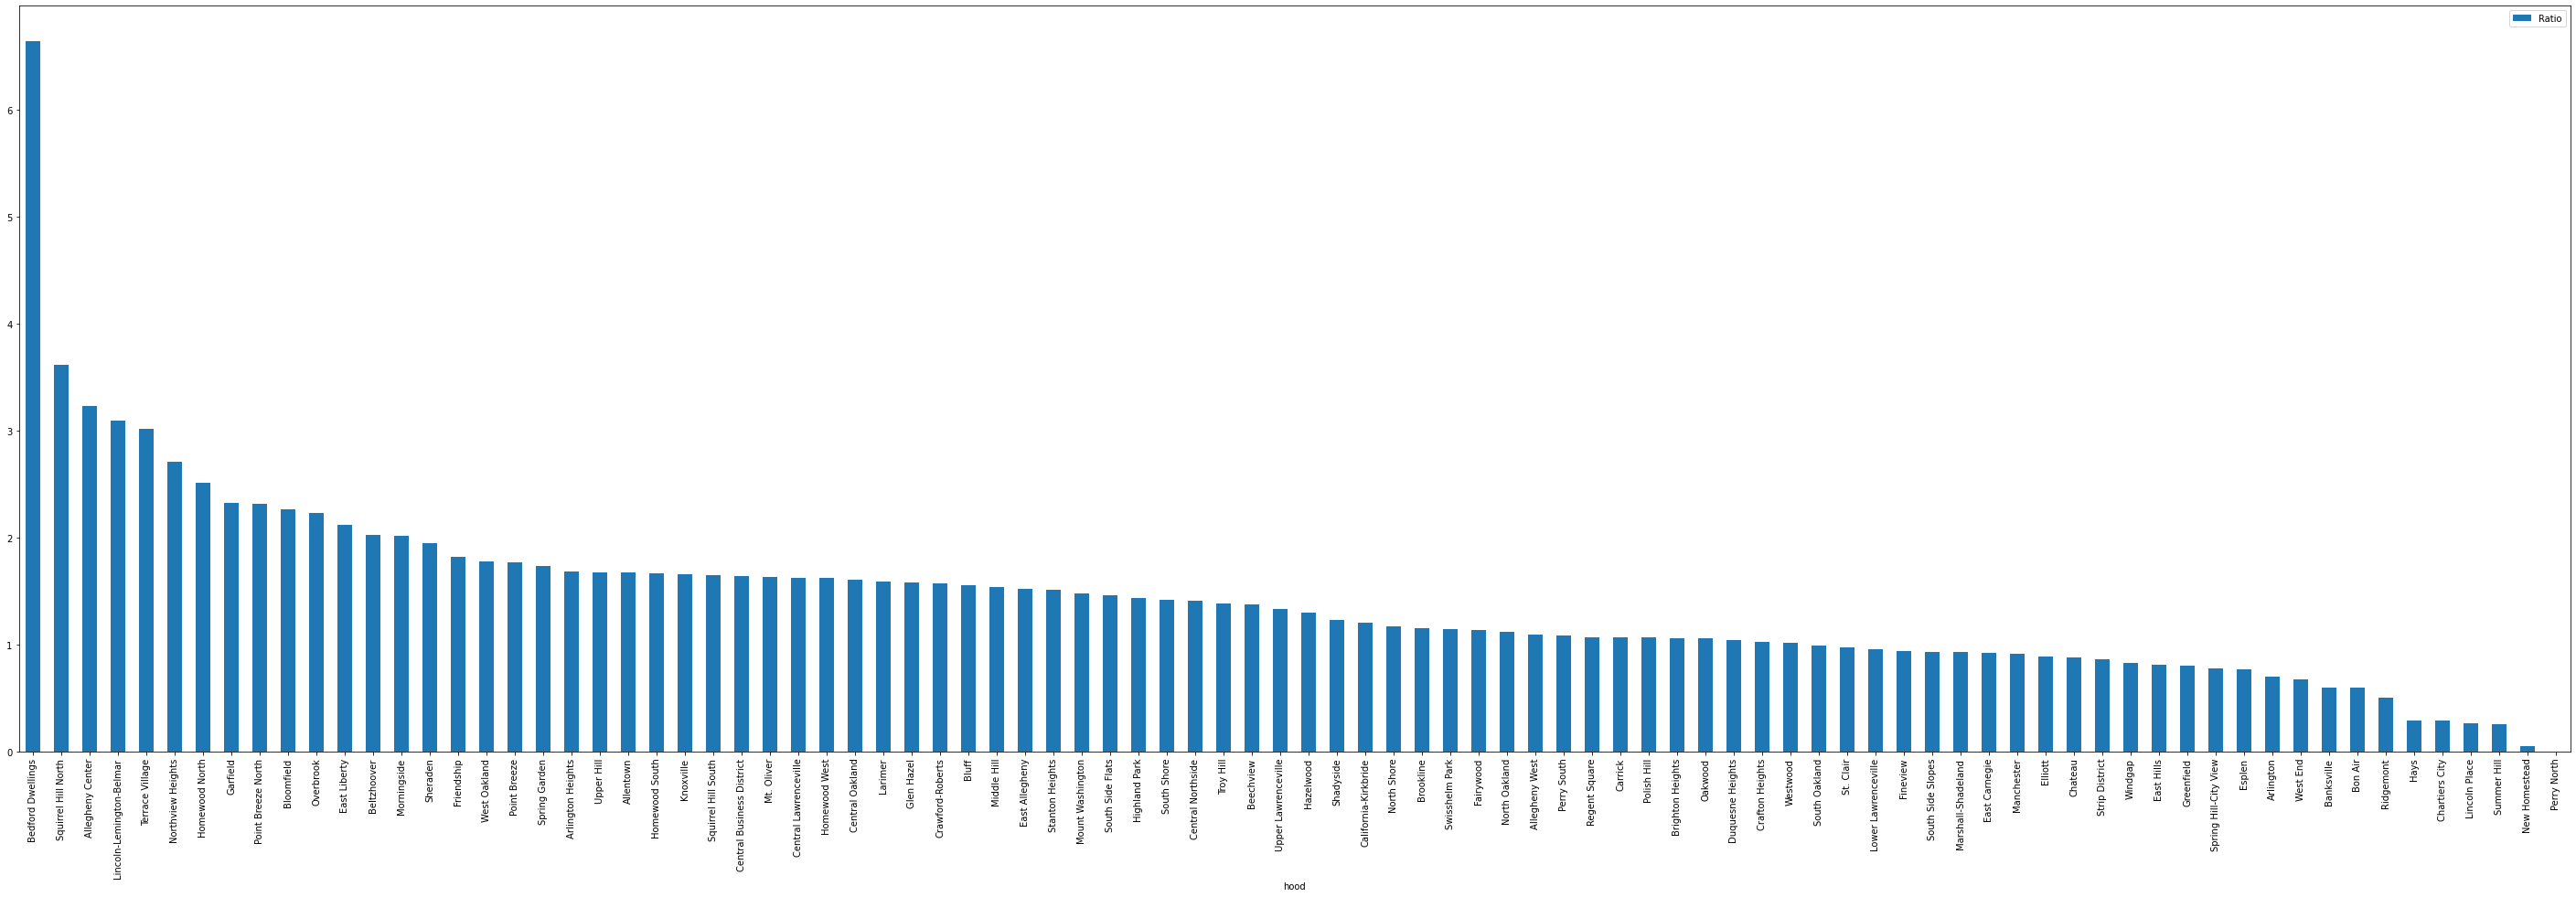

In [50]:
info.plot(kind="bar", figsize=(50,15), x='hood')

With the names and ratios of each neighborhood we can now display them in a bar graph, but it is a bit difficult to read since there are 90 neighborhoods making everything really small.

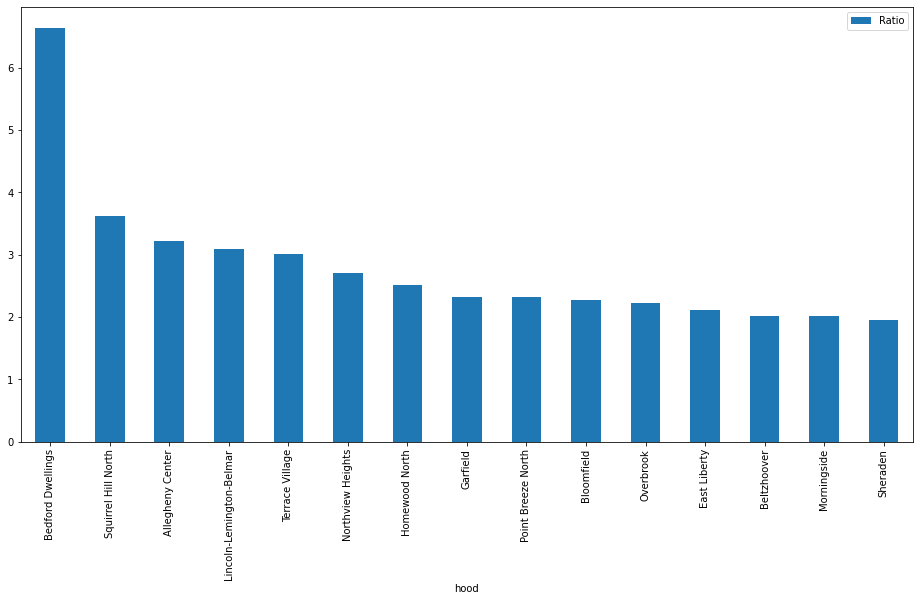

In [51]:
info.head(15).plot(kind="bar", figsize=(16,8), x='hood')

If we limit the data set to only the best 15 walkability ratios we can get a better view of what neighborhoods are the best. We can see that Bedford Dwellings has the highest ratio being nearly double squirrel hill which is second.

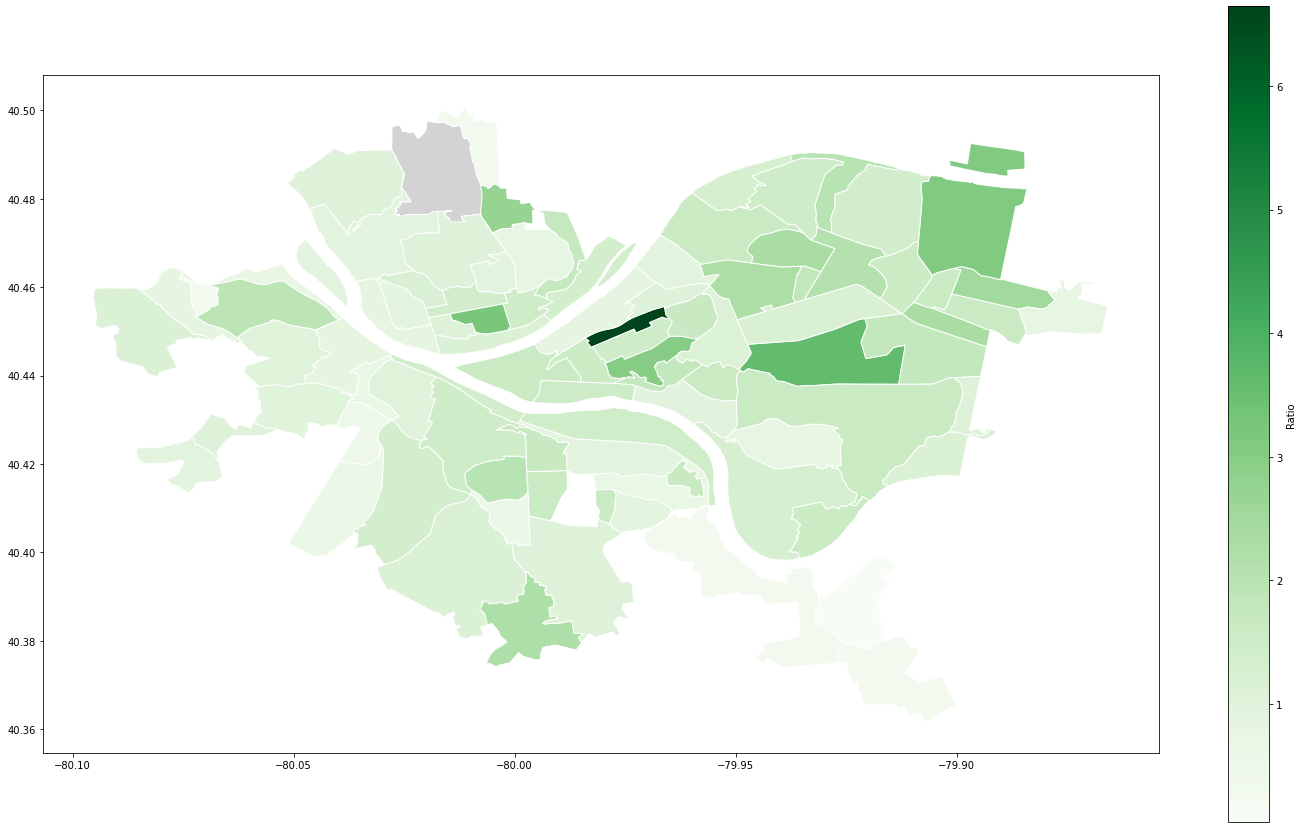

In [52]:
ratioMap = map.merge(info, how = 'left', left_on='hood', right_on='hood')
ratioMap.plot(column='Ratio',
               cmap='Greens',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Ratio"},
               figsize=(25, 15),
               missing_kwds={'color': 'lightgrey'}
               )

I merge the ratio data with the geo map of neighborhoods to display a map with the darkest green areas having the highest ratios

In [53]:
info2 = HoodInfo.merge(walkability, how='left', left_on='geoid10', right_on='GEOID')
info2 = info2[['hood', 'SidewalkStepLFt']]
info2 = info2.sort_values('SidewalkStepLFt', ascending=False)
info2

,hood,SidewalkStepLFt
81,Strip District,92663.562380
45,Allegheny Center,59326.329020
16,Northview Heights,58729.595540
24,Brookline,48177.985360
65,Troy Hill,40911.813860
...,...,...
64,Ridgemont,6369.255036
56,Central Lawrenceville,6121.119267
50,Chartiers City,3393.271454
37,New Homestead,1890.155427


Since the data set includes just the sidewalk and step length for each neighborhood, I thought it would be a good idea to see which neighborhoods just have the most sidewalk in general.

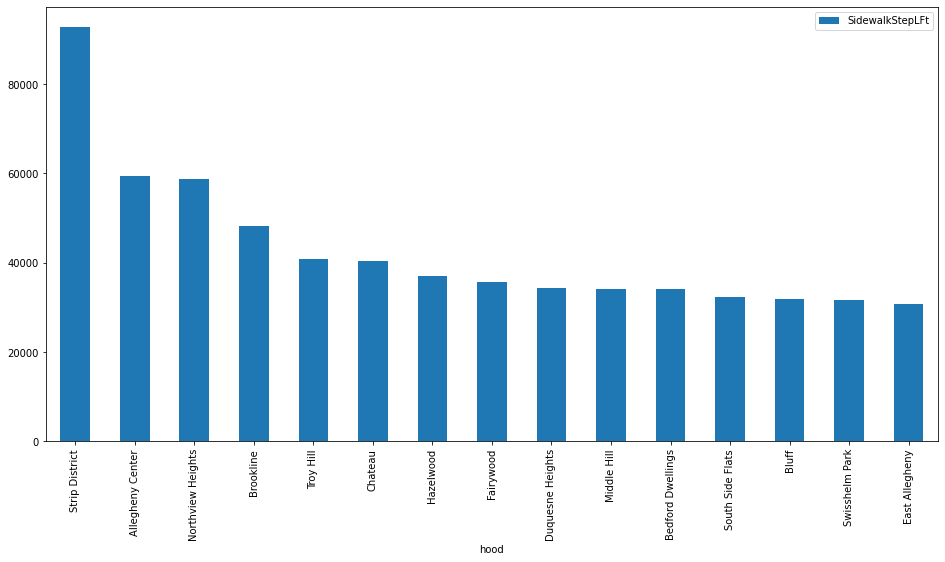

In [54]:
info2.head(15).plot(kind="bar", figsize=(16,8), x='hood')

After graphing it we can see that the strip district has the most sidewalk and stair length overall, followed by Allegheny Center. Allegheny

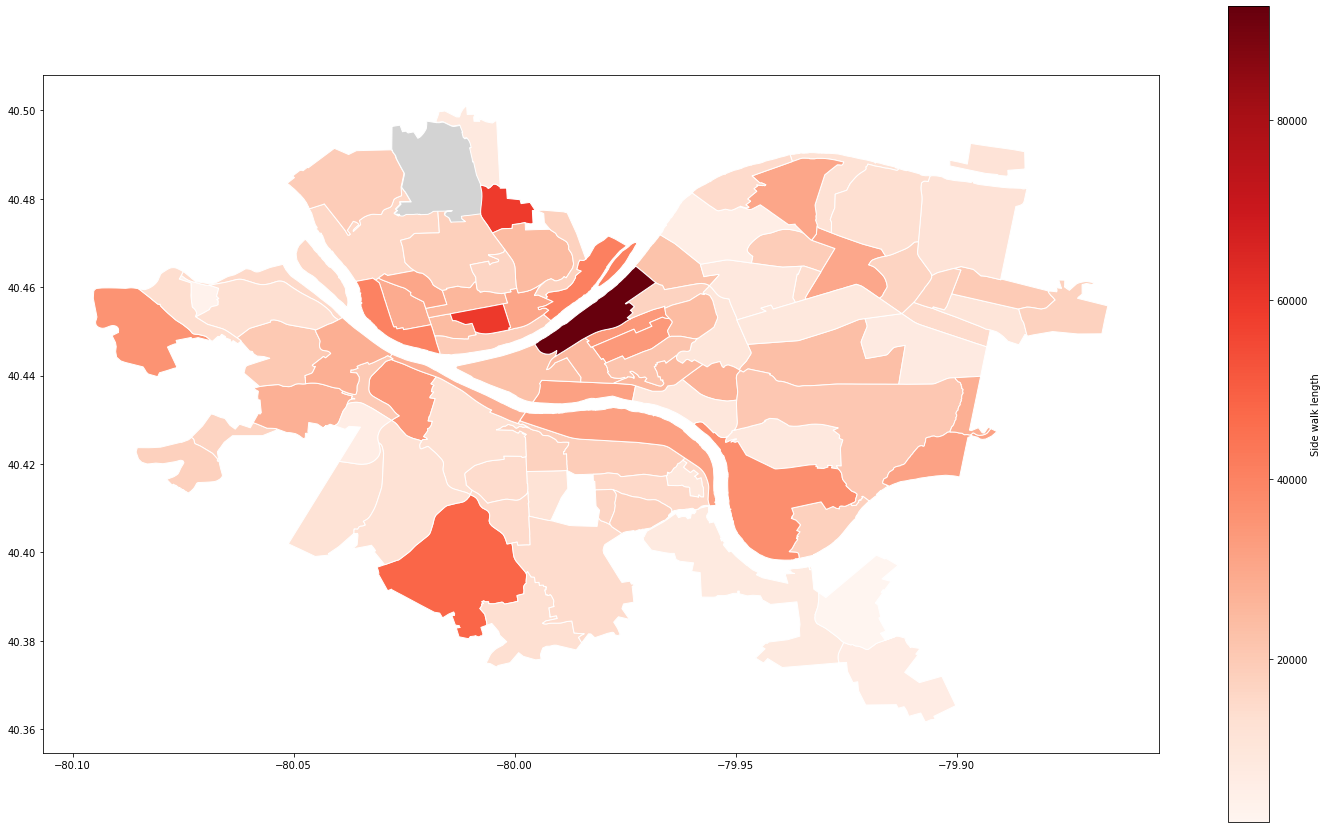

In [55]:
sidewalkMap = map.merge(info2, how = 'left', left_on='hood', right_on='hood')
sidewalkMap.plot(column='SidewalkStepLFt',
               cmap='Reds',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Side walk length"},
               figsize=(25, 15),
               missing_kwds={'color': 'lightgrey'}
               )